# customer_segmentation using RFM and K means

Dataset link: https://www.kaggle.com/code/mashallandme/customer-segmentation-with-rfm-and-kmeans/input

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [104]:
df=pd.read_excel('/content/Online Retail.xlsx')

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


#Dataset Description:



 **InvoiceNo**: Unique identifier for each transaction.

**StockCode**: Product code for each item sold.

**Description**: Name or description of the product.

**Quantity**: Number of units purchased in each transaction.

**InvoiceDate:** Date and time of the transaction.

**UnitPrice**: Price per unit of the product.

**CustomerID**: Unique identifier for each customer.

**Country**: The country where the customer is located or the product was shipped.

In [5]:
df.shape

(541909, 8)

There are **541909** records and **8** columns in the dataset.

In [6]:
df['InvoiceNo'].nunique()

25900

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(536641, 8)

# Cleaning

In [9]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135037
Country,0


CustomerID and Description column has Missing values

In [10]:
df[df["Description"].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [11]:
df["InvoiceNo"].nunique()

25900

In [12]:
df[df["CustomerID"].isna()]["InvoiceNo"].nunique()

3710

There are total 25900 unique transactions but 3710 transactions does not have a customerid

In [13]:
# Dealing with NA values of CustomerID

In [14]:
# Fill missing CustomerID values with InvoiceNo where CustomerID is NaN

In [15]:
df.loc[(df["CustomerID"].isna()) & (df["Country"]=="United Kingdom")].value_counts()

,,,,,,,,count
InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,


**Fill missing CustomerID values with InvoiceNo where CustomerID is NaN**

In [16]:
df["newID"]=df["CustomerID"].fillna(df["InvoiceNo"])

If a row has a missing (NaN) value in the CustomerID column, the corresponding value in NewID will be replaced by the InvoiceNo for that row.
If CustomerID is not NaN, the value in NewID will remain the same as CustomerID.


In [17]:
#removing non digits from newID
df["newID"]=df["newID"].astype(str).str.replace(r'\D', '',regex=True)

In [18]:
df["newID"].isnull().sum()

0

In [19]:
df["newID"]=pd.to_numeric(df["newID"],errors='coerce')

In [20]:
df[df["newID"]== 580605]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,newID
524602,C580605,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:36:00,17836.46,NaN,United Kingdom,580605


In [21]:
# so we have created new column, named newID which has not NA values, so we remove customerID column now
#df.drop(["CustomerID"],inplace=True,axis=1)

In [22]:

# Impute NA values in 'Description' column with 'No Description'
df['Description'].fillna('No Description', inplace=True)


<ipython-input-22-4d7600dd3488>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Description'].fillna('No Description', inplace=True)


In [23]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135037
Country,0
newID,0


In [24]:
# now thre are no null values

In [25]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,newID
count,536641.000000,536641,536641.000000,401604.000000,536641.000000
mean,9.620029,2011-07-04 08:57:06.087421952,4.632656,15281.160818,254779.760438
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000,123460.000000
25%,1.000000,2011-03-28 10:52:00,1.250000,13939.000000,143670.000000
50%,3.000000,2011-07-19 14:04:00,2.080000,15145.000000,162550.000000
75%,10.000000,2011-10-18 17:05:00,4.130000,16784.000000,536592.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,581498.000000
std,219.130156,NaN,97.233118,1714.006089,176614.981471


In [26]:
df.loc[df["Quantity"]==df["Quantity"].max()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,newID
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,164460


In [27]:
df["InvoiceDate"]=pd.to_datetime(df["InvoiceDate"])

# EDA

In [28]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,newID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,178500
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,178500
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,178500
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,178500
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,178500


In [29]:
#cancelled orders

In [30]:
df[df["InvoiceNo"].astype(str).str.startswith('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,newID
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,145270
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,153110
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,175480
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,175480
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,175480
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,143970
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,154980
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,153110
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,173150


In [31]:
cancelled_orders=df[df["InvoiceNo"].astype(str).str.startswith('C')]

In [32]:
cancelled_orders.shape

(9251, 9)

In [33]:
cancelled_orders[cancelled_orders["Quantity"]>0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,newID


In [34]:
df[df["Quantity"]<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,newID
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,145270
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,153110
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,175480
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,175480
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,175480
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,143970
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,154980
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,153110
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,173150


 Quantity is negative and its respective InvoiceNo no. starts with C , which means the order is cancelled or returned

In [35]:
cancelled_orders['Quantity'].describe()

,Quantity
count,9251.000000
mean,-29.787050
std,1147.997592
min,-80995.000000
25%,-6.000000
50%,-2.000000
75%,-1.000000
max,-1.000000


In [36]:
# customers who cancelled orders most of the time

In [37]:

# Group by 'newID' and count the number of cancelled orders
cancelled_by_customer = df[df['Quantity'] < 0].groupby('newID')['InvoiceNo'].count().reset_index(name='CancelledOrders')

# Find the customers with the highest number of cancelled orders
top_cancelling_customers = cancelled_by_customer.sort_values(by="CancelledOrders",ascending=False)
top_cancelling_customers.head()


,newID,CancelledOrders
736,149110,226
1485,178410,136
1397,175110,113
848,153110,112
89,126070,101


CustomerID 149110 has cancelled orders most of the time among all.
It helps in addressing the reasons behind cancellations, potentially reducing return rates, improving customer satisfaction, and optimizing overall business performance.

In [38]:
df.drop(df[df["Quantity"]<0].index,inplace=True)

From,EDA we get to Know that, negative quantity means person has cancelled or returned the order,so we remove that.


In [39]:
df[df["UnitPrice"]<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,newID
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom,563186
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom,563187


As Unitprice is negative , so which means it is refunded, we remove it

In [40]:
#df[df["UnitPrice"]>0]
df.drop(df[df["UnitPrice"]<0].index,inplace=True)

In [41]:
df.shape

(526052, 9)

**Total orders per unique customer**

In [42]:
total_orders_per_customer = df.groupby('newID')['InvoiceNo'].count().sort_values(ascending=False).reset_index(name='TotalOrders')
total_orders_per_customer.shape

(6529, 2)

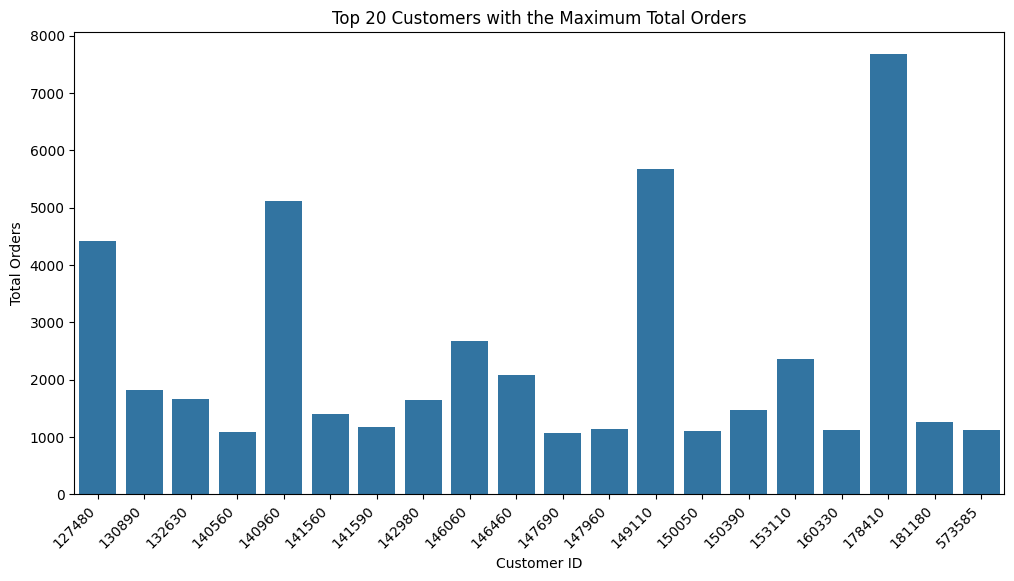

In [43]:
# Graphical representation:

plt.figure(figsize=(12, 6))
sns.barplot(x='newID', y='TotalOrders', data=total_orders_per_customer.head(20))
plt.xlabel('Customer ID')
plt.ylabel('Total Orders')
plt.title('Top 20 Customers with the Maximum Total Orders')
plt.xticks(rotation=45, ha='right')
plt.show()

# no. of distinct orders per unique customer

In [44]:
distinct_orders=df.groupby("newID")["InvoiceNo"].nunique().sort_values(ascending=False).reset_index(name="no. of distinct orders")
distinct_orders.head()

,newID,no. of distinct orders
0,127480,210
1,149110,201
2,178410,124
3,130890,97
4,146060,93


In [45]:
distinct_orders.tail()

,newID,no. of distinct orders
6524,172450,1
6525,172470,1
6526,172480,1
6527,172510,1
6528,581498,1


In [46]:
distinct_orders["no. of distinct orders"].describe()

,no. of distinct orders
count,6529.000000
mean,3.174452
std,6.468583
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,210.000000


On average, 3 distinct orders per customer and overall 10 orders per customer, so we have to find weather any product is very popular among all?
 What's the distribution of the number of items the customers buy?



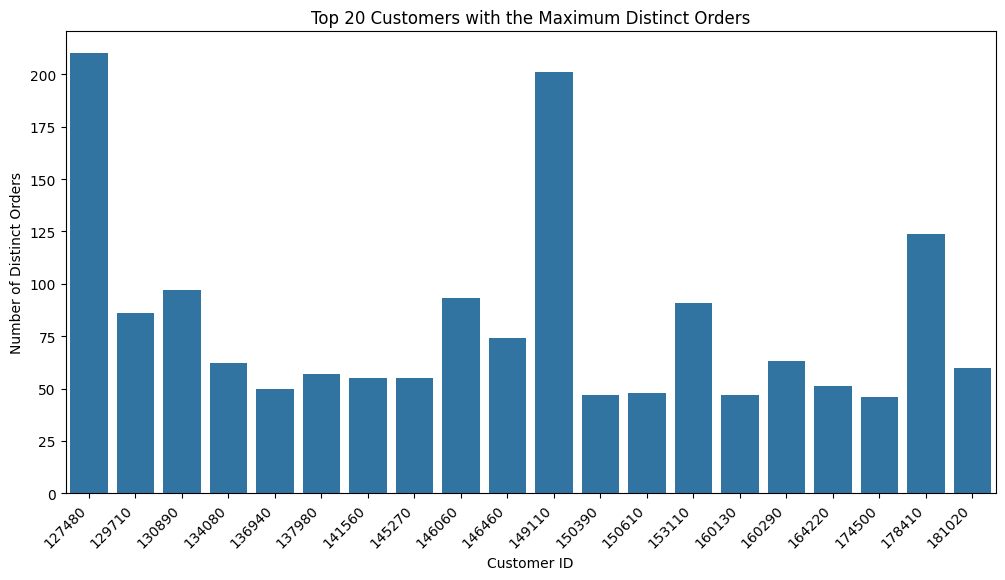

In [47]:
#Graphical representation :

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.barplot(x='newID', y='no. of distinct orders', data=distinct_orders.head(20))
plt.xlabel('Customer ID')
plt.ylabel('Number of Distinct Orders')
plt.title('Top 20 Customers with the Maximum Distinct Orders')
plt.xticks(rotation=45, ha='right')
plt.show()


# No. of products per order

In [48]:
distinct_product_per_order=pd.DataFrame(df.groupby("InvoiceNo")["StockCode"].nunique().sort_values(ascending=False).reset_index(name="no. of distinct product per order"))
distinct_product_per_order.head()

,InvoiceNo,no. of distinct product per order
0,573585,1110
1,581219,749
2,581492,731
3,580729,721
4,558475,704


Higher no. of product per order shows customers are purchasing a wide variety of items in a single transaction, which could indicate that they are either buying for multiple purposes or are exploratory shoppers.

In [49]:
distinct_product_per_order.tail()

,InvoiceNo,no. of distinct product per order
20721,574518,1
20722,550460,1
20723,577829,1
20724,550450,1
20725,A563185,1


In [50]:
distinct_product_per_order.describe()

,no. of distinct product per order
count,20726.000000
mean,25.125350
std,46.346898
min,1.000000
25%,5.000000
50%,15.000000
75%,28.000000
max,1110.000000


 On average, customers are ordering around 25 distinct products per transaction.
  The minimum value (1) shows that some orders consist of only a single product, while the maximum value (1,110) indicates a very large order with many distinct items

# No. of products per customer

In [51]:
No_of_products_per_customer=pd.DataFrame(df.groupby("newID")["StockCode"].nunique().sort_values(ascending=False).reset_index(name="no. of distinct product per customer"))
No_of_products_per_customer.head()

,newID,no. of distinct product per customer
0,149110,1787
1,127480,1768
2,178410,1323
3,140960,1119
4,573585,1110


In [52]:
No_of_products_per_customer['no. of distinct product per customer'].describe()

,no. of distinct product per customer
count,6529.000000
mean,61.215347
std,97.865594
min,1.000000
25%,7.000000
50%,28.000000
75%,73.000000
max,1787.000000


# New column: Total Revenue

In [53]:
df["Total Revenue"]=df["Quantity"]*df["UnitPrice"]

Invoicedate

In [54]:
max_date=df["InvoiceDate"].max()
min_date=df["InvoiceDate"].min()
print(min_date)
print(max_date)

2010-12-01 08:26:00
2011-12-09 12:50:00


In [55]:
import datetime as dt

**In which month there's maximum revenue generated ?**

In [56]:
df.groupby(df['InvoiceDate'].dt.to_period('M'))["Total Revenue"].sum().sort_values(ascending=False).head(10)

,Total Revenue
InvoiceDate,
2011-11,1503866.780
2011-10,1151263.730
2011-09,1056435.192
2010-12,821452.730
2011-05,769296.610
2011-06,760547.010
2011-08,757841.380
2011-07,718076.121
2011-03,716215.260


Highest Revenue generated in the month of Sep,Oct and Nov of 2011, so company can increase the stocks in these months for future income.

# Total Revenue per country

In [57]:
df["Country"].nunique()

38

In [58]:
revenue_per_country=pd.DataFrame(df.groupby("Country")["Total Revenue"].sum().sort_values(ascending=False))
revenue_per_country.head(10)

,Total Revenue
Country,
United Kingdom,9001744.094
Netherlands,285446.340
EIRE,283140.520
Germany,228678.400
France,209625.370
Australia,138453.810
Spain,61558.560
Switzerland,57067.600
Belgium,41196.340


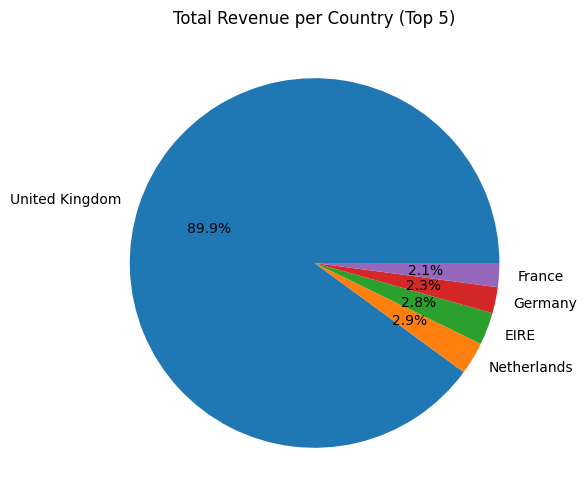

In [59]:
import matplotlib.pyplot as plt

top_n_countries = 5
top_countries = revenue_per_country.head(top_n_countries)

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(top_countries['Total Revenue'], labels=top_countries.index,autopct='%1.1f%%')
plt.title('Total Revenue per Country (Top {})'.format(top_n_countries))
plt.show()


In [60]:
revenue_per_country.tail(5)
# These are the 5 countries which has generated lowest revenue

,Total Revenue
Country,
Brazil,1143.60
RSA,1002.31
Czech Republic,826.74
Bahrain,754.14
Saudi Arabia,145.92


In [61]:
# top_customer_by_revenue

In [62]:
# Grouping by both newID and Country, and then summing the Total Revenue
top_customer_by_revenue = pd.DataFrame(
    df.groupby(["newID", "Country"])["Total Revenue"].sum().sort_values(ascending=False)
)

top_customer_by_revenue.head()


,,Total Revenue
newID,Country,
146460,Netherlands,280206.02
181020,United Kingdom,259657.30
174500,United Kingdom,194390.79
164460,United Kingdom,168472.50
149110,EIRE,143711.17


Here this shows customerID 146460 has highest revenue from Netherlands,so he/she can be high valued customer, but as you can see this doesn't depend on how much maximum products you are buying because ID 149110 has ordered maximum products among all but still his/her revenue is not max from all.

so this shows us that, even if highest revenue is from United Kingdom ,person with high revenue is from another country

<ipython-input-63-cc690680d9e8>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=50, ha="right")


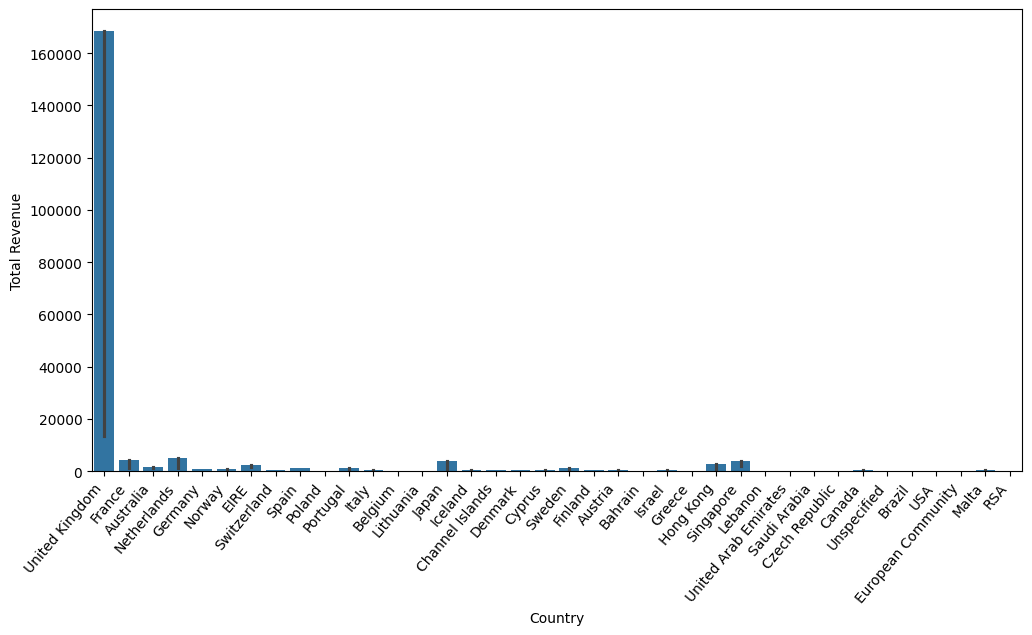

In [63]:
fig1, ax1 = plt.subplots(figsize=(12,6),dpi=100)
# Changing 'Total_Revenue' to 'Total Revenue' in the y parameter
ax1=sns.barplot(x='Country', y='Total Revenue', data=df, estimator=max, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=50, ha="right")
plt.show()

In [64]:
df.groupby("Country")["newID"].nunique().sort_values(ascending=False).head(5)

,newID
Country,
United Kingdom,6056
Germany,94
France,90
EIRE,31
Spain,30


As the revenue and customers for UK is the most, so we will target those customers for further analysis.


# UK Market

In [65]:
df_uk=df[df["Country"]=="United Kingdom"]

In [66]:
df_uk.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,newID,Total Revenue
count,481141.000000,481141,481141.000000,349227.000000,481141.000000,481141.000000
mean,9.806537,2011-07-04 05:18:59.836638720,3.855941,15548.333625,265846.983533,18.709160
min,1.000000,2010-12-01 08:26:00,0.000000,12346.000000,123460.000000,0.000000
25%,1.000000,2011-03-27 12:06:00,1.250000,14191.000000,146530.000000,3.400000
50%,3.000000,2011-07-19 11:57:00,2.100000,15518.000000,166720.000000,8.500000
75%,10.000000,2011-10-20 10:41:00,4.130000,16931.000000,539437.000000,17.000000
max,80995.000000,2011-12-09 12:49:00,13541.330000,18287.000000,581498.000000,168469.600000
std,164.116424,NaN,34.819990,1594.403077,180237.230955,282.438253


In [67]:
print("Percentage of customers from the UK: ", round(df_uk['newID'].nunique() * 100 / df['newID'].nunique(),2),"%" )
print("Number of transactions: ", df_uk['InvoiceNo'].nunique())
print("Number of products Bought: ", df_uk['StockCode'].nunique())
print("Number of customers:", df_uk['newID'].nunique())

Percentage of customers from the UK:  92.76 %
Number of transactions:  18784
Number of products Bought:  3936
Number of customers: 6056


In [68]:
uk_product = df_uk.groupby(['StockCode','Description'],as_index= False)['Quantity'].sum().sort_values(by='Quantity', ascending=False)
uk_product.head(10)

,StockCode,Description,Quantity
2881,23843,"PAPER CRAFT , LITTLE BIRDIE",80995
2315,23166,MEDIUM CERAMIC TOP STORAGE JAR,77036
3113,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,49430
4296,85099B,JUMBO BAG RED RETROSPOT,44165
4310,85123A,WHITE HANGING HEART T-LIGHT HOLDER,35434
1241,22197,POPCORN HOLDER,34726
3240,84879,ASSORTED COLOUR BIRD ORNAMENT,33636
1662,22616,PACK OF 12 LONDON TISSUES,25315
438,21212,PACK OF 72 RETROSPOT CAKE CASES,24963
1219,22178,VICTORIAN GLASS HANGING T-LIGHT,23663


In [69]:
df_uk.shape

(481141, 10)

In [70]:
df_uk = df_uk[df_uk['Quantity']>0]
df_uk.shape

(481141, 10)

In [71]:
#remove rows where customerID are NA
df_uk.dropna(subset=['CustomerID'],how='all',inplace=True)
df_uk.shape

(349227, 10)

#a. Recency: Days since last purchase

In [72]:
df_uk['InvoiceDate'].max()

Timestamp('2011-12-09 12:49:00')

In [73]:
now = dt.date(2011,12,9)
#Create a new column called Date which contains the invoice date without the timestamp
df_uk['Date'] = df_uk['InvoiceDate'].dt.date
#Group by NewID and check the last date of purchase
df_recency = df_uk.groupby(by='CustomerID', as_index=False)['Date'].max()
df_recency.columns = ['CustomerID', 'Last_Purchase_Date']
df_recency.head()

,CustomerID,Last_Purchase_Date
0,12346.0,2011-01-18
1,12747.0,2011-12-07
2,12748.0,2011-12-09
3,12749.0,2011-12-06
4,12820.0,2011-12-06


In [74]:
#Calculate the days since last purchase
df_recency['Recency'] = df_recency['Last_Purchase_Date'].apply(lambda x: (now - x).days)
df_recency.head()

,CustomerID,Last_Purchase_Date,Recency
0,12346.0,2011-01-18,325
1,12747.0,2011-12-07,2
2,12748.0,2011-12-09,0
3,12749.0,2011-12-06,3
4,12820.0,2011-12-06,3


In [75]:
df_recency.drop("Last_Purchase_Date",inplace=True,axis=1)
df_recency.head()

,CustomerID,Recency
0,12346.0,325
1,12747.0,2
2,12748.0,0
3,12749.0,3
4,12820.0,3


In [76]:
df_uk_copy = df_uk
df_uk_copy.drop_duplicates(subset=['InvoiceNo', 'CustomerID'], keep="first", inplace=True)

#Calculate the frequency of purchases
df_frequency = df_uk_copy.groupby(by='CustomerID', as_index=False)['InvoiceNo'].count()
df_frequency.columns = ['CustomerID','Frequency']
df_frequency.head()

,CustomerID,Frequency
0,12346.0,1
1,12747.0,11
2,12748.0,210
3,12749.0,5
4,12820.0,4


In [77]:
df_monetary=df_uk.groupby("CustomerID",as_index=False)["Total Revenue"].sum()
df_monetary.columns=["CustomerID","Monetary"]
df_monetary.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12747.0,689.49
2,12748.0,3841.31
3,12749.0,98.35
4,12820.0,58.20


# RFM Table

RFM (Recency, Frequency, Monetary) Analysis is a customer segmentation technique for analyzing customer value based on past buying behavior.

It answers the following questions:

Who are our best customers? Who has the potential to be converted into more profitable customers? Which customers do we need to retain? Which group of customers is most likely to respond to our marketing campaign?

In [78]:
df_rfm=df_recency.merge(df_frequency,on="CustomerID").merge(df_monetary,on="CustomerID")
df_rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,2,11,689.49
2,12748.0,0,210,3841.31
3,12749.0,3,5,98.35
4,12820.0,3,4,58.20


<Axes: xlabel='Recency', ylabel='Count'>

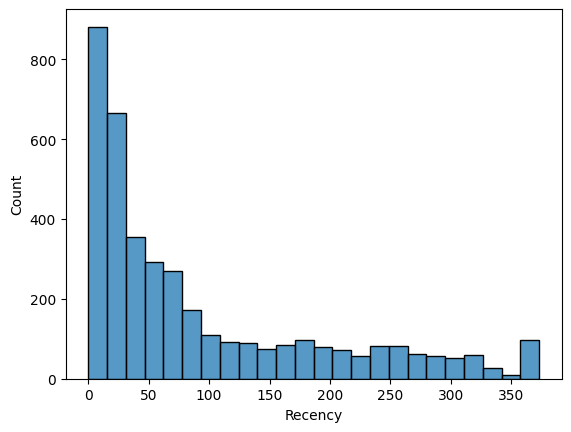

In [79]:
import seaborn as sns
sns.histplot(df_rfm["Recency"])

<Axes: xlabel='Frequency', ylabel='Count'>

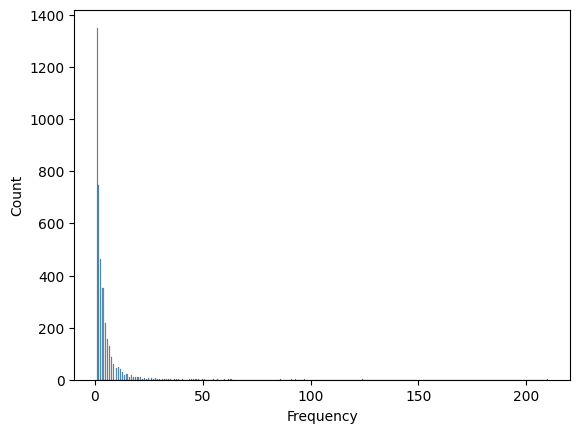

In [80]:
import seaborn as sns
sns.histplot(df_rfm["Frequency"])

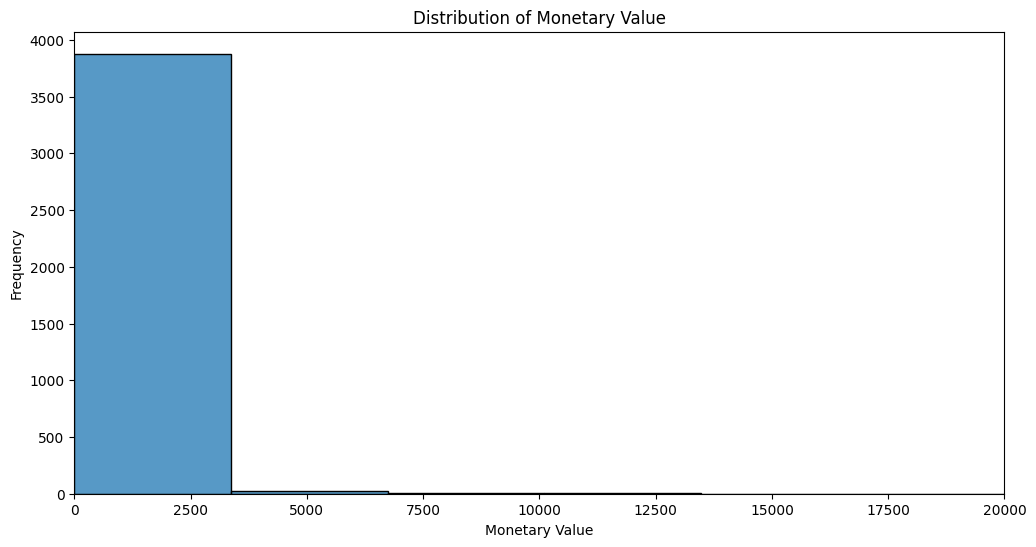

In [81]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(df_rfm['Monetary'], bins=50)
plt.xlabel('Monetary Value')
plt.ylabel('Frequency')
plt.title('Distribution of Monetary Value')
plt.xlim(0, 20000)
plt.show()


<Axes: xlabel='Monetary', ylabel='Count'>

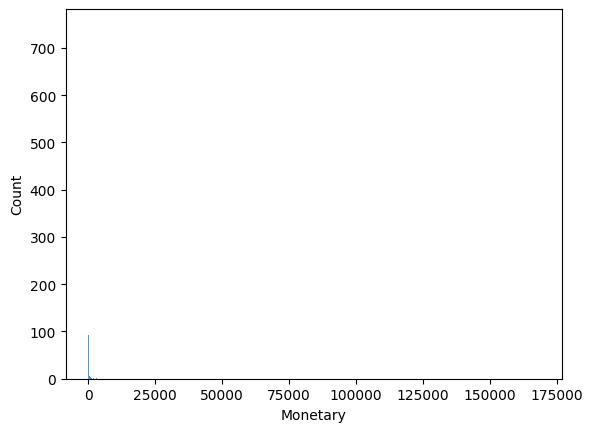

In [82]:
import seaborn as sns
sns.histplot(df_rfm["Monetary"])

In [83]:
import pandas as pd

# Assuming your RFM table is in 'df'

# Recency score: Lower values are better (recent purchases), so they get a higher score
df_rfm['R_Score'] = pd.qcut(df_rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])

# Frequency score: Higher values are better, so they get a higher score
df_rfm['F_Score'] = pd.qcut(df_rfm['Frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

# Monetary score: Higher values are better, so they get a higher score
df_rfm['M_Score'] = pd.qcut(df_rfm['Monetary'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])


In [84]:
df_rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score
0,12346.0,325,1,77183.60,1,1,5
1,12747.0,2,11,689.49,5,5,5
2,12748.0,0,210,3841.31,5,5,5
3,12749.0,3,5,98.35,5,4,4
4,12820.0,3,4,58.20,5,4,3


In [85]:
# Combine the R, F, and M scores to create an overall RFM score
df_rfm['RFM_Score'] = df_rfm['R_Score'].astype(str) + df_rfm['F_Score'].astype(str) + df_rfm['M_Score'].astype(str)

df_rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,12346.0,325,1,77183.60,1,1,5,115
1,12747.0,2,11,689.49,5,5,5,555
2,12748.0,0,210,3841.31,5,5,5,555
3,12749.0,3,5,98.35,5,4,4,544
4,12820.0,3,4,58.20,5,4,3,543


Using customer segmentation categories found here we can formulate different marketing strategies and approaches for customer engagement for each type of customer.





In [86]:
df_rfm[df_rfm['RFM_Score']=='555'].head(5)

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
1,12747.0,2,11,689.49,5,5,5,555
2,12748.0,0,210,3841.31,5,5,5,555
21,12839.0,2,14,233.91,5,5,5,555
23,12841.0,4,25,328.74,5,5,5,555
45,12877.0,3,12,365.79,5,5,5,555


In [87]:
df_rfm[df_rfm['RFM_Score']=='111'].head(5)

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
101,12956.0,306,1,3.75,1,1,1,111
116,12982.0,242,1,10.40,1,1,1,111
120,12988.0,292,1,4.25,1,1,1,111
131,13002.0,318,1,15.00,1,1,1,111
136,13008.0,323,1,15.00,1,1,1,111


In [88]:
# Categorize based on RFM Score
def categorize_rfm(df_rfm):
    df_rfm['RFM_Category'] = 'Other'  # Default category

    df_rfm.loc[df_rfm['RFM_Score'].isin(['555', '554', '545', '544']), 'RFM_Category'] = 'Top Customers'
    df_rfm.loc[df_rfm['RFM_Score'].isin(['543', '534', '533']), 'RFM_Category'] = 'Loyal Customers'
    df_rfm.loc[df_rfm['RFM_Score'].isin(['522', '523', '524']), 'RFM_Category'] = 'Potential Loyalists'
    df_rfm.loc[df_rfm['RFM_Score'].isin(['551', '552', '553']), 'RFM_Category'] = 'Recent Customers'
    df_rfm.loc[df_rfm['RFM_Score'].isin(['451', '452', '453']), 'RFM_Category'] = 'Promising Customers'
    df_rfm.loc[df_rfm['RFM_Score'].isin(['332', '331', '333']), 'RFM_Category'] = 'Needs Attention'
    df_rfm.loc[df_rfm['RFM_Score'].isin(['211', '221', '311']), 'RFM_Category'] = 'At Risk'
    df_rfm.loc[df_rfm['RFM_Score'].isin(['111', '112', '113']), 'RFM_Category'] = 'Inactive Customers'
    df_rfm.loc[df_rfm['RFM_Score'].isin(['111', '121', '131']), 'RFM_Category'] = 'Lost'

    return df_rfm

# Apply the categorization
df_rfm = categorize_rfm(df_rfm)


Top Customers: High spenders who make frequent purchases and have recently shopped.

Loyal Customers: Regular and consistent buyers who frequently engage with the brand.

Potential Loyalists: New or less frequent customers showing high potential for loyalty.

Recent Customers: Customers who have made a purchase very recently but may not be frequent buyers yet.

Promising Customers: Customers who show potential based on moderate frequency and spending.

Needs Attention: Customers whose engagement has decreased and need reactivation strategies.

At Risk: Previously active customers who haven't made purchases recently.

Inactive Customers: Customers with very low or no recent activity but may still return.

Lost: Customers who have disengaged for a long period and are unlikely to return.

In [89]:
df_rfm.head(10)

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,RFM_Category
0,12346.0,325,1,77183.60,1,1,5,115,Other
1,12747.0,2,11,689.49,5,5,5,555,Top Customers
2,12748.0,0,210,3841.31,5,5,5,555,Top Customers
3,12749.0,3,5,98.35,5,4,4,544,Top Customers
4,12820.0,3,4,58.20,5,4,3,543,Loyal Customers
5,12821.0,214,1,19.92,1,1,2,112,Inactive Customers
6,12822.0,70,2,30.80,3,2,2,322,Other
7,12823.0,74,5,1759.50,2,4,5,245,Other
8,12824.0,59,1,5.04,3,1,1,311,At Risk
9,12826.0,2,7,122.80,5,5,4,554,Top Customers


Here,you can see customers are segmented into Top customer, loyal, Inactive etc.

In [96]:
# since all R,F,M values are skewed we convert them into log values for future clustering purpose

In [92]:
rfm_r_log = np.log(df_rfm['Recency']+0.1) #log(0) is undefined
rfm_f_log = np.log(df_rfm['Frequency'])
rfm_m_log = np.log(df_rfm['Monetary']+0.1)
log_data = pd.DataFrame({'Monetary': rfm_m_log, 'Recency': rfm_r_log, 'Frequency': rfm_f_log})
log_data.head()

,Monetary,Recency,Frequency
0,11.253944,5.784133,0.000000
1,6.536097,0.741937,2.397895
2,8.253595,-2.302585,5.347108
3,4.589549,1.131402,1.609438
4,4.065602,1.131402,1.386294


# K Means Clusterring

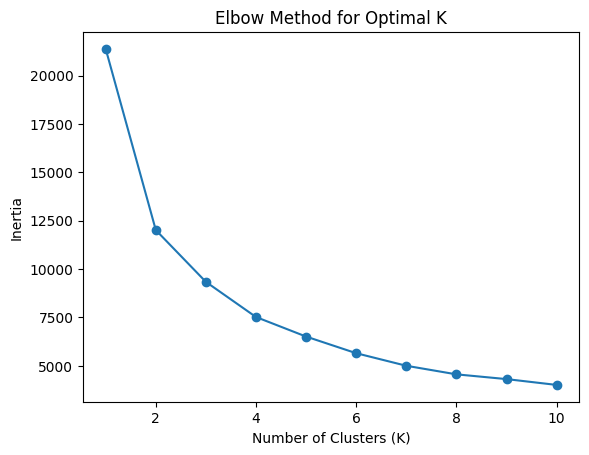

In [93]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(log_data[['Recency','Monetary', 'Frequency']])
    inertia.append(kmeans.inertia_)

# Plot the Elbow method
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()


Optimal no. of clusters : 4

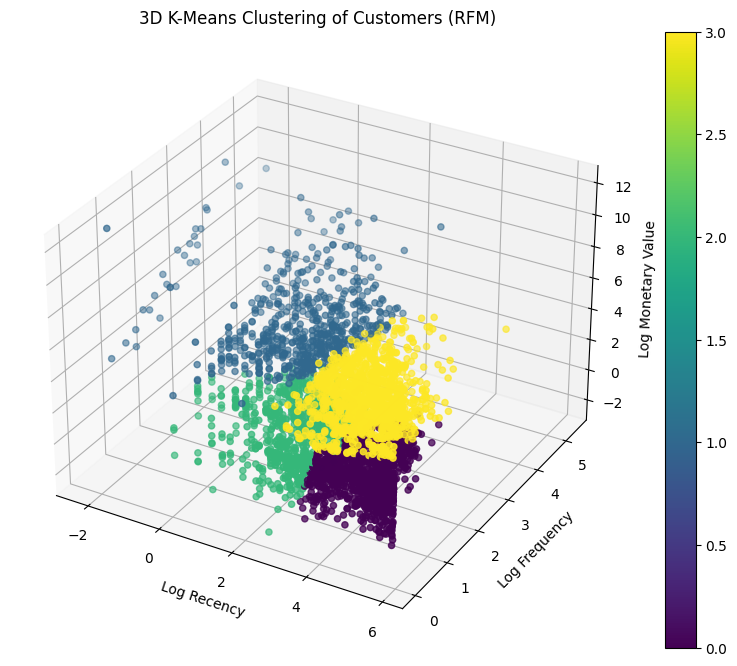

In [103]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.cluster import KMeans

# Choose the optimal number of clusters based on elbow method (k=4)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(log_data[['Recency', 'Frequency', 'Monetary']])

# Add the cluster labels to the dataframe
log_data['Cluster'] = kmeans.labels_

# Plot 3D scatterplot for Recency, Frequency, and Monetary values
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the clusters in 3D space
scatter = ax.scatter(log_data['Recency'], log_data['Frequency'], log_data['Monetary'],
                     c=log_data['Cluster'], cmap='viridis')

# Add labels and title
ax.set_title('3D K-Means Clustering of Customers (RFM)')
ax.set_xlabel('Log Recency')
ax.set_ylabel('Log Frequency')
ax.set_zlabel('Log Monetary Value')

# Add a color bar
plt.colorbar(scatter)

# Show the plot
plt.show()


Summary of Cluster and Customer Segment Mapping:

Cluster 1 (Purple): Inactive Customers / Lost Customers

Cluster 2 (Green): Promising Customers

Cluster 3 (Blue): Potential Loyalists / Loyal Customers

Cluster 4 (Yellow): Top Customers

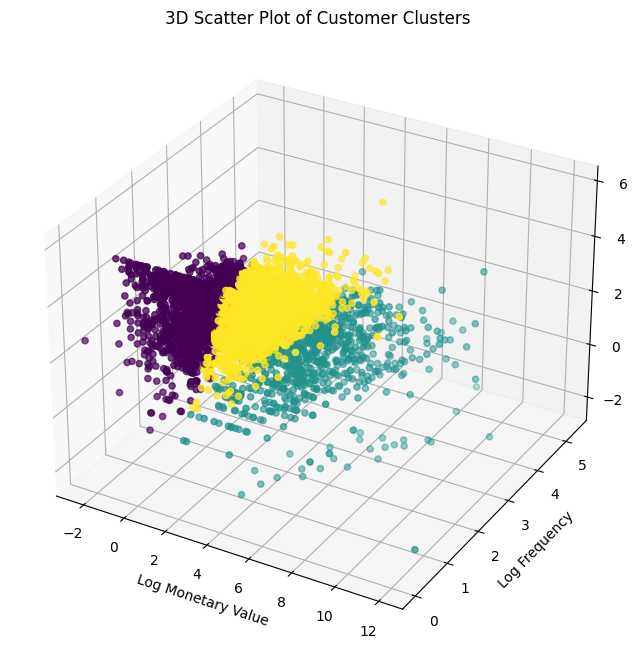

In [99]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(log_data['Monetary'], log_data['Frequency'], log_data['Recency'], c=log_data['Cluster'], cmap='viridis')

ax.set_xlabel('Log Monetary Value')
ax.set_ylabel('Log Frequency')
ax.set_zlabel('Log Recency')
ax.set_title('3D Scatter Plot of Customer Clusters')

plt.show()
